In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras


print(tf.test.is_gpu_available())
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

True
2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.21.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
import pprint

pprint.pprint(housing.data[:5])
pprint.pprint(housing.target[:5])


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])
array([4.526, 3.585, 3.521, 3.413, 3.422])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all,x_test,y_train_all,y_test = train_test_split(housing.data,housing.target,random_state=7)

x_train,x_valid,y_train,y_vaild=train_test_split(x_train_all,y_train_all,random_state=11)

print(x_train.shape,y_train.shape)
print(x_valid.shape,y_vaild.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
# 数据标准化

from sklearn.preprocessing import StandardScaler

saclar = StandardScaler()
x_train_sacled = saclar.fit_transform(x_train)
x_valid_sacled = saclar.transform(x_valid)
x_test_sacled=saclar.transform(x_test)

In [6]:
x_train.shape[1:]

(8,)

In [7]:
# RandomizedSearchCV
# 1. 转化为sklearn的model
# 2、定义参数集合
# 3、搜索集合


In [8]:
# 1. 转化为sklearn的model

# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※

def build_model(hidden_layers=1,layer_size=30,learning_rate=3e-3):
    model = keras.models.Sequential()
    # 第一个隐含层需要设置一个输入的shape    
    model.add(keras.layers.Dense(layer_size,activation="relu",input_shape=x_train.shape[1:]))
    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(layer_size,activation="relu"))
    
    model.add(keras.layers.Dense(1))
    optimzer = keras.optimizers.SGD(learning_rate)
    model.compile(loss="mse",optimzer=optimzer)
    return model


sklearn_model = keras.wrappers.scikit_learn.KerasRegressor(build_fn=build_model)
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]
history = sklearn_model.fit(x_train_sacled,y_train,epochs=100,validation_data=(x_valid_sacled,y_vaild),callbacks=callbacks)


# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 178us/sample - loss: 1.0308 - val_loss: 0.5541
Epoch 2/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.5244 - val_loss: 0.4498
Epoch 3/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.4360 - val_loss: 0.4168
Epoch 4/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.3860 - val_loss: 0.4042
Epoch 5/100
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3612 - val_loss: 0.3755
Epoch 6/100
11610/11610 [==============================] - 1s 91us/sample - loss: 0.3573 - val_loss: 0.3662
Epoch 7/100
11610/11610 [==============================] - 1s 90us/sample - loss: 0.3466 - val_loss: 0.3549
Epoch 8/100
11610/11610 [==============================] - 1s 93us/sample - loss: 0.3373 - val_loss: 0.3688
Epoch 9/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.33

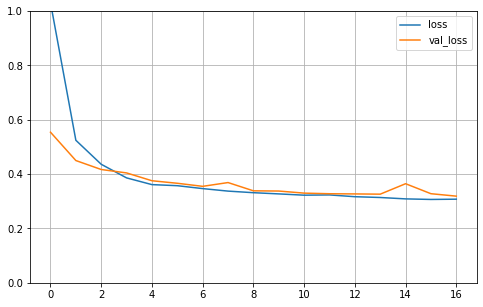

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
    
plot_learning_curves(history)

In [10]:
# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※
from scipy.stats import reciprocal
# 2、定义参数集合
param_distribution = {
    "hidden_layers":[1,2,3,4],
    "layer_size":np.arange(1,100),
    "learning_rate":reciprocal(1e-4,1e-2)
}

# 3、搜索集合
from sklearn.model_selection import RandomizedSearchCV

random_serach_cv = RandomizedSearchCV(sklearn_model,param_distribution,n_iter=10,n_jobs=1)

random_serach_cv.fit(x_train_sacled,y_train,epochs=100,validation_data=(x_valid_sacled,y_vaild),callbacks=callbacks)

# cross_validation:训练集分成n份，n-1训练，最后一份验证

# ※※※※※※※※※※※※※※※※※※※※※※※※※※※※※※

F:\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 203us/sample - loss: 0.7263 - val_loss: 0.5176
Epoch 2/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.4138 - val_loss: 0.3933
Epoch 3/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3817 - val_loss: 0.3630
Epoch 4/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3548 - val_loss: 0.3730
Epoch 5/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3429 - val_loss: 0.3521
Epoch 6/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3328 - val_loss: 0.3654
Epoch 7/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3302 - val_loss: 0.3457
Epoch 8/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3151 - val_loss: 0.3283
Epoch 9/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3092 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 203us/sample - loss: 0.6515 - val_loss: 0.4799
Epoch 2/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.4073 - val_loss: 0.4203
Epoch 3/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3802 - val_loss: 0.3615
Epoch 4/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3473 - val_loss: 0.3368
Epoch 5/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3396 - val_loss: 0.3329
Epoch 6/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3344 - val_loss: 0.3724
Epoch 7/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3175 - val_loss: 0.3362
Epoch 8/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3066 - val_loss: 0.3634
Epoch 9/100
7740/7740 [==============================] - 1s 118us/sample - loss: 0.3009 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 217us/sample - loss: 0.5763 - val_loss: 0.4166
Epoch 2/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3903 - val_loss: 0.3617
Epoch 3/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3573 - val_loss: 0.3546
Epoch 4/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3299 - val_loss: 0.3690
Epoch 5/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3226 - val_loss: 0.3502
Epoch 6/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3132 - val_loss: 0.3515
Epoch 7/100
7740/7740 [==============================] - 1s 108us/sample - loss: 0.3082 - val_loss: 0.3548
Epoch 8/100
7740/7740 [==============================] - 1s 108us/sample - loss: 0.3017 - val_loss: 0.3332
Epoch 9/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.2861 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 239us/sample - loss: 1.1023 - val_loss: 0.5414
Epoch 2/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.4708 - val_loss: 0.4614
Epoch 3/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.4119 - val_loss: 0.3990
Epoch 4/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3836 - val_loss: 0.3718
Epoch 5/100
7740/7740 [==============================] - 1s 120us/sample - loss: 0.3648 - val_loss: 0.3817
Epoch 6/100
7740/7740 [==============================] - 1s 118us/sample - loss: 0.3546 - val_loss: 0.3447
Epoch 7/100
7740/7740 [==============================] - 1s 123us/sample - loss: 0.3413 - val_loss: 0.3395
Epoch 8/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3309 - val_loss: 0.3438
Epoch 9/100
7740/7740 [==============================] - 1s 125us/sample - loss: 0.3280 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 216us/sample - loss: 1.4357 - val_loss: 0.5642
Epoch 2/100
7740/7740 [==============================] - 1s 118us/sample - loss: 0.4554 - val_loss: 0.4316
Epoch 3/100
7740/7740 [==============================] - 1s 118us/sample - loss: 0.3898 - val_loss: 0.4242
Epoch 4/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3661 - val_loss: 0.4262
Epoch 5/100
7740/7740 [==============================] - 1s 121us/sample - loss: 0.3532 - val_loss: 0.3517
Epoch 6/100
7740/7740 [==============================] - 1s 120us/sample - loss: 0.3462 - val_loss: 0.3378
Epoch 7/100
7740/7740 [==============================] - 1s 120us/sample - loss: 0.3323 - val_loss: 0.3387
Epoch 8/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.3263 - val_loss: 0.3421
Epoch 9/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.3193 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 228us/sample - loss: 0.9886 - val_loss: 0.5085
Epoch 2/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.4343 - val_loss: 0.4278
Epoch 3/100
7740/7740 [==============================] - 1s 124us/sample - loss: 0.3842 - val_loss: 0.3975
Epoch 4/100
7740/7740 [==============================] - 1s 129us/sample - loss: 0.3608 - val_loss: 0.4151
Epoch 5/100
7740/7740 [==============================] - 1s 126us/sample - loss: 0.3510 - val_loss: 0.3652
Epoch 6/100
7740/7740 [==============================] - 1s 121us/sample - loss: 0.3358 - val_loss: 0.3484
Epoch 7/100
7740/7740 [==============================] - 1s 129us/sample - loss: 0.3228 - val_loss: 0.3403
Epoch 8/100
7740/7740 [==============================] - 1s 128us/sample - loss: 0.3138 - val_loss: 0.3641
Epoch 9/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3143 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 214us/sample - loss: 0.7464 - val_loss: 0.4500
Epoch 2/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.4105 - val_loss: 0.3766
Epoch 3/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3952 - val_loss: 0.5698
Epoch 4/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3492 - val_loss: 0.3477
Epoch 5/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3574 - val_loss: 0.3408
Epoch 6/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3297 - val_loss: 0.3820
Epoch 7/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3583 - val_loss: 0.3228
Epoch 8/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3039 - val_loss: 0.3422
Epoch 9/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3091 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 219us/sample - loss: 0.6516 - val_loss: 0.4444
Epoch 2/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.4064 - val_loss: 0.3937
Epoch 3/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3775 - val_loss: 0.3718
Epoch 4/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3530 - val_loss: 0.3662
Epoch 5/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3401 - val_loss: 0.3775
Epoch 6/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3233 - val_loss: 0.3472
Epoch 7/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3125 - val_loss: 0.3250
Epoch 8/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3342 - val_loss: 0.3139
Epoch 9/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.2956 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 195us/sample - loss: 0.6273 - val_loss: 0.4115
Epoch 2/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3867 - val_loss: 0.3711
Epoch 3/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3515 - val_loss: 0.3435
Epoch 4/100
7740/7740 [==============================] - 1s 108us/sample - loss: 0.3319 - val_loss: 0.3496
Epoch 5/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3177 - val_loss: 0.4096
Epoch 6/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3018 - val_loss: 0.3198
Epoch 7/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.2926 - val_loss: 0.3120
Epoch 8/100
7740/7740 [==============================] - 1s 108us/sample - loss: 0.2927 - val_loss: 0.3254
Epoch 9/100
7740/7740 [==============================] - 1s 108us/sample - loss: 0.2821 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 219us/sample - loss: 0.7545 - val_loss: 0.4371
Epoch 2/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.4108 - val_loss: 0.3677
Epoch 3/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3816 - val_loss: 0.3949
Epoch 4/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3502 - val_loss: 0.4067
Epoch 5/100
7740/7740 [==============================] - 1s 118us/sample - loss: 0.3380 - val_loss: 0.3499
Epoch 6/100
7740/7740 [==============================] - 1s 120us/sample - loss: 0.3284 - val_loss: 0.3286
Epoch 7/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3141 - val_loss: 0.3374
Epoch 8/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3103 - val_loss: 0.3247
Epoch 9/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3070 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 194us/sample - loss: 0.6798 - val_loss: 0.4364
Epoch 2/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.4154 - val_loss: 0.4241
Epoch 3/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3799 - val_loss: 0.3850
Epoch 4/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3579 - val_loss: 0.3707
Epoch 5/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3421 - val_loss: 0.3918
Epoch 6/100
7740/7740 [==============================] - 1s 120us/sample - loss: 0.3377 - val_loss: 0.3394
Epoch 7/100
7740/7740 [==============================] - 1s 120us/sample - loss: 0.3182 - val_loss: 0.3331
Epoch 8/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3138 - val_loss: 0.3261
Epoch 9/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3126 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 218us/sample - loss: 0.7251 - val_loss: 0.4338
Epoch 2/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3941 - val_loss: 0.3829
Epoch 3/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3620 - val_loss: 0.3545
Epoch 4/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3458 - val_loss: 0.3930
Epoch 5/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3318 - val_loss: 0.3479
Epoch 6/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3131 - val_loss: 0.3535
Epoch 7/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3228 - val_loss: 0.3203
Epoch 8/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3116 - val_loss: 0.4503
Epoch 9/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.2980 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 185us/sample - loss: 0.7262 - val_loss: 0.4576
Epoch 2/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.4113 - val_loss: 0.3864
Epoch 3/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.3849 - val_loss: 0.4071
Epoch 4/100
7740/7740 [==============================] - 1s 94us/sample - loss: 0.3889 - val_loss: 0.3750
Epoch 5/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3564 - val_loss: 0.3569
Epoch 6/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3637 - val_loss: 0.3634
Epoch 7/100
7740/7740 [==============================] - 1s 94us/sample - loss: 0.3357 - val_loss: 0.3401
Epoch 8/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3422 - val_loss: 0.3298
Epoch 9/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3233 - val_loss: 0.33

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 158us/sample - loss: 0.7739 - val_loss: 0.4509
Epoch 2/100
7740/7740 [==============================] - 1s 94us/sample - loss: 0.4168 - val_loss: 0.3975
Epoch 3/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3791 - val_loss: 0.3965
Epoch 4/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3585 - val_loss: 0.3599
Epoch 5/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3527 - val_loss: 0.4070
Epoch 6/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.3444 - val_loss: 0.3488
Epoch 7/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3431 - val_loss: 0.3905
Epoch 8/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.3199 - val_loss: 0.3347
Epoch 9/100
7740/7740 [==============================] - 1s 94us/sample - loss: 0.3232 - val_loss: 0.32

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 162us/sample - loss: 0.7934 - val_loss: 0.4507
Epoch 2/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3999 - val_loss: 0.3848
Epoch 3/100
7740/7740 [==============================] - 1s 94us/sample - loss: 0.3614 - val_loss: 0.3886
Epoch 4/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.3439 - val_loss: 0.3735
Epoch 5/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.3421 - val_loss: 0.3498
Epoch 6/100
7740/7740 [==============================] - 1s 98us/sample - loss: 0.3210 - val_loss: 0.3904
Epoch 7/100
7740/7740 [==============================] - 1s 105us/sample - loss: 0.3169 - val_loss: 0.3376
Epoch 8/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.3279 - val_loss: 0.3369
Epoch 9/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.3029 - val_loss: 0

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 221us/sample - loss: 0.7245 - val_loss: 0.4386
Epoch 2/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.4083 - val_loss: 0.3815
Epoch 3/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3792 - val_loss: 0.3725
Epoch 4/100
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3769 - val_loss: 0.3579
Epoch 5/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3371 - val_loss: 0.3294
Epoch 6/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3313 - val_loss: 0.3684
Epoch 7/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3215 - val_loss: 0.3284
Epoch 8/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3164 - val_loss: 0.3832
Epoch 9/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3065 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 221us/sample - loss: 0.6997 - val_loss: 0.4383
Epoch 2/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.4001 - val_loss: 0.3877
Epoch 3/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3688 - val_loss: 0.3526
Epoch 4/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3523 - val_loss: 0.3546
Epoch 5/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3348 - val_loss: 0.3230
Epoch 6/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3332 - val_loss: 0.3214
Epoch 7/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3192 - val_loss: 0.3432
Epoch 8/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3101 - val_loss: 0.3426
Epoch 9/100
7740/7740 [==============================] - 1s 118us/sample - loss: 0.3065 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 200us/sample - loss: 0.8892 - val_loss: 0.4381
Epoch 2/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3966 - val_loss: 0.4581
Epoch 3/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3674 - val_loss: 0.4132
Epoch 4/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3459 - val_loss: 0.3571
Epoch 5/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3321 - val_loss: 0.3452
Epoch 6/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3180 - val_loss: 0.3598
Epoch 7/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3122 - val_loss: 0.3529
Epoch 8/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3062 - val_loss: 0.3744
Epoch 9/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3044 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 165us/sample - loss: 2.0318 - val_loss: 1.1473
Epoch 2/100
7740/7740 [==============================] - 1s 95us/sample - loss: 1.0061 - val_loss: 0.8307
Epoch 3/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.7784 - val_loss: 0.6721
Epoch 4/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.6619 - val_loss: 0.5863
Epoch 5/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.5579 - val_loss: 0.5242
Epoch 6/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.5094 - val_loss: 0.4794
Epoch 7/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.4737 - val_loss: 0.4513
Epoch 8/100
7740/7740 [==============================] - 1s 102us/sample - loss: 0.4509 - val_loss: 0.4347
Epoch 9/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4379 - val_loss: 0.4

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 189us/sample - loss: 3.1967 - val_loss: 1.1973
Epoch 2/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.8056 - val_loss: 0.7639
Epoch 3/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.6431 - val_loss: 0.6385
Epoch 4/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.5580 - val_loss: 0.5583
Epoch 5/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.5064 - val_loss: 0.5109
Epoch 6/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.4798 - val_loss: 0.4814
Epoch 7/100
7740/7740 [==============================] - 1s 102us/sample - loss: 0.4563 - val_loss: 0.4683
Epoch 8/100
7740/7740 [==============================] - 1s 103us/sample - loss: 0.4481 - val_loss: 0.4494
Epoch 9/100
7740/7740 [==============================] - 1s 101us/sample - loss: 0.4410 - val_los

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 164us/sample - loss: 2.9661 - val_loss: 1.2705
Epoch 2/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.9815 - val_loss: 0.7625
Epoch 3/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.6362 - val_loss: 0.6363
Epoch 4/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.5448 - val_loss: 0.5539
Epoch 5/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4951 - val_loss: 0.5103
Epoch 6/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.4650 - val_loss: 0.4815
Epoch 7/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4454 - val_loss: 0.4694
Epoch 8/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4352 - val_loss: 0.4595
Epoch 9/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4245 - val_loss: 0.45

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 239us/sample - loss: 1.2229 - val_loss: 0.5768
Epoch 2/100
7740/7740 [==============================] - 1s 121us/sample - loss: 0.4595 - val_loss: 0.4426
Epoch 3/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.4048 - val_loss: 0.3955
Epoch 4/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3761 - val_loss: 0.3814
Epoch 5/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3580 - val_loss: 0.3735
Epoch 6/100
7740/7740 [==============================] - 1s 120us/sample - loss: 0.3482 - val_loss: 0.3611
Epoch 7/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.3392 - val_loss: 0.3796
Epoch 8/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3333 - val_loss: 0.3452
Epoch 9/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3278 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 214us/sample - loss: 0.8967 - val_loss: 0.5323
Epoch 2/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.4517 - val_loss: 0.4821
Epoch 3/100
7740/7740 [==============================] - 1s 120us/sample - loss: 0.4024 - val_loss: 0.4117
Epoch 4/100
7740/7740 [==============================] - 1s 123us/sample - loss: 0.3756 - val_loss: 0.3793
Epoch 5/100
7740/7740 [==============================] - 1s 124us/sample - loss: 0.3599 - val_loss: 0.3677
Epoch 6/100
7740/7740 [==============================] - 1s 123us/sample - loss: 0.3516 - val_loss: 0.3521
Epoch 7/100
7740/7740 [==============================] - 1s 123us/sample - loss: 0.3425 - val_loss: 0.3518
Epoch 8/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3388 - val_loss: 0.3422
Epoch 9/100
7740/7740 [==============================] - 1s 123us/sample - loss: 0.3340 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 262us/sample - loss: 1.3110 - val_loss: 0.6721
Epoch 2/100
7740/7740 [==============================] - 1s 130us/sample - loss: 0.5328 - val_loss: 0.4889
Epoch 3/100
7740/7740 [==============================] - 1s 136us/sample - loss: 0.4318 - val_loss: 0.4427
Epoch 4/100
7740/7740 [==============================] - 1s 130us/sample - loss: 0.4002 - val_loss: 0.4178
Epoch 5/100
7740/7740 [==============================] - 1s 130us/sample - loss: 0.3762 - val_loss: 0.3913
Epoch 6/100
7740/7740 [==============================] - 1s 124us/sample - loss: 0.3573 - val_loss: 0.4360
Epoch 7/100
7740/7740 [==============================] - 1s 129us/sample - loss: 0.3451 - val_loss: 0.3704
Epoch 8/100
7740/7740 [==============================] - 1s 128us/sample - loss: 0.3342 - val_loss: 0.3664
Epoch 9/100
7740/7740 [==============================] - 1s 126us/sample - loss: 0.3264 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 161us/sample - loss: 1.3929 - val_loss: 0.6551
Epoch 2/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.5312 - val_loss: 0.4874
Epoch 3/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.4498 - val_loss: 0.4359
Epoch 4/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4282 - val_loss: 0.4109
Epoch 5/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4045 - val_loss: 0.4007
Epoch 6/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3896 - val_loss: 0.3836
Epoch 7/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3749 - val_loss: 0.3790
Epoch 8/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3673 - val_loss: 0.3704
Epoch 9/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3593 - val_loss: 0.37

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 183us/sample - loss: 1.8998 - val_loss: 0.7245
Epoch 2/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.5572 - val_loss: 0.5241
Epoch 3/100
7740/7740 [==============================] - 1s 98us/sample - loss: 0.4962 - val_loss: 0.5015
Epoch 4/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4728 - val_loss: 0.4510
Epoch 5/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.4460 - val_loss: 0.4361
Epoch 6/100
7740/7740 [==============================] - 1s 98us/sample - loss: 0.4117 - val_loss: 0.4093
Epoch 7/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3813 - val_loss: 0.3958
Epoch 8/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3663 - val_loss: 0.3756
Epoch 9/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3585 - val_loss: 0.3

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 167us/sample - loss: 1.1795 - val_loss: 0.6768
Epoch 2/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.5222 - val_loss: 0.5061
Epoch 3/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.4316 - val_loss: 0.4436
Epoch 4/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3947 - val_loss: 0.4102
Epoch 5/100
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3775 - val_loss: 0.3966
Epoch 6/100
7740/7740 [==============================] - 1s 100us/sample - loss: 0.3650 - val_loss: 0.3910
Epoch 7/100
7740/7740 [==============================] - 1s 104us/sample - loss: 0.3556 - val_loss: 0.3867
Epoch 8/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.3484 - val_loss: 0.3831
Epoch 9/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.3406 - val_loss: 0

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 202us/sample - loss: 0.6440 - val_loss: 0.4134
Epoch 2/100
7740/7740 [==============================] - 1s 110us/sample - loss: 0.4211 - val_loss: 0.5770
Epoch 3/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3742 - val_loss: 0.3425
Epoch 4/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3543 - val_loss: 0.3748
Epoch 5/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3368 - val_loss: 0.3255
Epoch 6/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3268 - val_loss: 0.3284
Epoch 7/100
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3154 - val_loss: 0.3203
Epoch 8/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3087 - val_loss: 0.3602
Epoch 9/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.2969 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 228us/sample - loss: 0.6517 - val_loss: 0.5284
Epoch 2/100
7740/7740 [==============================] - 1s 114us/sample - loss: 0.4074 - val_loss: 0.3655
Epoch 3/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3668 - val_loss: 0.3498
Epoch 4/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3500 - val_loss: 0.3427
Epoch 5/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3334 - val_loss: 0.3498
Epoch 6/100
7740/7740 [==============================] - 1s 112us/sample - loss: 0.3185 - val_loss: 0.3278
Epoch 7/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3250 - val_loss: 0.3295
Epoch 8/100
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3095 - val_loss: 0.3919
Epoch 9/100
7740/7740 [==============================] - 1s 113us/sample - loss: 0.2974 - val_lo

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 217us/sample - loss: 0.6224 - val_loss: 0.3949
Epoch 2/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3990 - val_loss: 0.3697
Epoch 3/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3562 - val_loss: 0.4040
Epoch 4/100
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3555 - val_loss: 0.3420
Epoch 5/100
7740/7740 [==============================] - 1s 131us/sample - loss: 0.3367 - val_loss: 0.3309
Epoch 6/100
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3121 - val_loss: 0.3399
Epoch 7/100
7740/7740 [==============================] - 1s 121us/sample - loss: 0.3061 - val_loss: 0.3226
Epoch 8/100
7740/7740 [==============================] - 1s 118us/sample - loss: 0.2939 - val_loss: 0.3061
Epoch 9/100
7740/7740 [==============================] - 1s 119us/sample - loss: 0.2899 - val_lo

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 181us/sample - loss: 0.8181 - val_loss: 0.3956
Epoch 2/100
11610/11610 [==============================] - 1s 102us/sample - loss: 0.3790 - val_loss: 0.4412
Epoch 3/100
11610/11610 [==============================] - 1s 102us/sample - loss: 0.3509 - val_loss: 0.3437
Epoch 4/100
11610/11610 [==============================] - 1s 104us/sample - loss: 0.3495 - val_loss: 0.3640
Epoch 5/100
11610/11610 [==============================] - 1s 105us/sample - loss: 0.3198 - val_loss: 0.4345
Epoch 6/100
11610/11610 [==============================] - 1s 104us/sample - loss: 0.3163 - val_loss: 0.3143
Epoch 7/100
11610/11610 [==============================] - 1s 106us/sample - loss: 0.2979 - val_loss: 0.3207
Epoch 8/100
11610/11610 [==============================] - 1s 109us/sample - loss: 0.3165 - val_loss: 0.3114
Epoch 9/100
11610/11610 [==============================] - 1s 104us/sample - lo

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x000001EF594F8788>,
                   iid='warn', n_iter=10, n_jobs=1,
                   param_distributions={'hidden_layers': [1, 2, 3, 4],
                                        'layer_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EF594F7B48>},
                   pre_dispatch='2*n_jobs', random_state=None, r

In [11]:
np.arange(1,100)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [12]:
random_serach_cv.best_params_

{'hidden_layers': 3, 'layer_size': 71, 'learning_rate': 0.002792326011155842}

In [13]:
random_serach_cv.best_score_

-0.30744197197149375

In [15]:
random_serach_cv.best_estimator_

In [16]:
model = random_serach_cv.best_estimator_.model
model.evaluate(x_test_sacled,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.2911301975564439